# Module-3: Classification II

Classification is the process of classifying data in the diferent categories based on training data it was fitted. In this question bank, we will be applying Naive Bayes, SVM, and KNN to classify the data.

# Scenario 1: Emerald Oyster Resorts

Emerald Oyster is proud to have been catering business and luxury travelers for more than 50 years. The worldwide offering of high-end hotel stays, customer services and with best in class chefs of every locus. The accommodations are designed in such a way that they reflect the surrounding environment with decor and hotel's location. Each hotel exhibits its own sense of style and individual properties with 24-hour customer service.
## Problem Statement:

Recent visitors do say, you should brace yourself for the high cost of meals at multiple restaurants located in the resort. In order to resolve this issue, the amenities can be remodeled with new menu and choices based on the economical condition of the customer. As the resorts cover a wide area only rich people go in depths of the resorts who buy the shuttle services; customers with low budget only explore the outer parts of the resorts. The task is to identify economic class of the customer based on the data collected so that the board can resolve this with proper remodeling.
### Tasks to be performed

In order to attain the above goal below tasks must be performed:

. Read the dataset with no headers; Then put respective columns names and find the missing values in each column. - Beginner

• Process any null values present in the data with the respective method - Beginner - Create two datasets one using dummy variable and one using LabelEncoder - Intermediate

Split both the datasets into training and testing set and apply Gaussian Naive Bayes - Intermediate

Evaluate both the model using confusion matrix. - Advanced

Apply Bernoulli Naive Bayes on both the datasets and evaluate them again. - Advanced

## Question-1: Read the dataset with no headers; Then put respective columns names and find the missing values in each column.

In [2]:
import pandas as pd 
import warnings
warnings. filterwarnings("ignore")

In [26]:
cols=['Age', 'Workaclass', 'Fnlugt', 'Education', 'Edu_num', 'Marital_Status', 'Occupation', 'Relationship','Race', 'Sex', 'Capital_gain', 'Capital_loss','HPW', 'Native_Country','Target']

In [27]:
data = pd.read_csv('guest_data.csv', header= None) 
data.columns=cols

In [28]:
data.head()

,Age,Workaclass,Fnlugt,Education,Edu_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,HPW,Native_Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workaclass      46043 non-null  object
 2   Fnlugt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Edu_num         48842 non-null  int64 
 5   Marital_Status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital_gain    48842 non-null  int64 
 11  Capital_loss    48842 non-null  int64 
 12  HPW             48842 non-null  int64 
 13  Native_Country  47985 non-null  object
 14  Target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [32]:
data.shape

(48842, 15)

In [33]:
data.isnull().sum()

Age                  0
Workaclass        2799
Fnlugt               0
Education            0
Edu_num              0
Marital_Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
HPW                  0
Native_Country     857
Target               0
dtype: int64

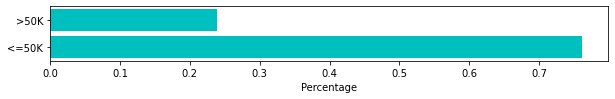

In [34]:
#Target distribution.

def target_distribution (data, col):
    target_ratio=pd.DataFrame({'Counts':data[col].value_counts(),
                               'Percentage' :data[col].value_counts()/len(data)})
    import matplotlib.pyplot as plt
    import seaborn as sns 
    plt.figure(figsize=(10,1))
    plt.barh(target_ratio.index, target_ratio.Percentage,color='c')
    plt.xlabel('Percentage')
    plt.show()

target_distribution(data, 'Target')

## Question-2: Process any null values present in the data with the respective method.

In [35]:
miss=pd.DataFrame({'Col_name':data.columns, 'Missing value?':
                            [any(data[x].isnull()) for x in data.columns],
                  'Count_' :[sum(data[y].isnull()) for y in data.columns],
                            'Percentage':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})

miss.sort_values(by='Count_', ascending=False)

,Col_name,Missing value?,Count_,Percentage
6,Occupation,True,2809,0.057512
1,Workaclass,True,2799,0.057307
13,Native_Country,True,857,0.017546
0,Age,False,0,0.000000
2,Fnlugt,False,0,0.000000
3,Education,False,0,0.000000
4,Edu_num,False,0,0.000000
5,Marital_Status,False,0,0.000000
7,Relationship,False,0,0.000000
8,Race,False,0,0.000000


In [36]:
print("Total Missing Values: %s"%sum(miss.Count_))

Total Missing Values: 6465


In [37]:
import numpy as np

In [38]:
for i in miss [miss. Count_!=0]. Col_name:
    temp=data[i].mode()
    tes=data[i].isnull()
    ind=tes[tes==True].index
    quill=list(data[i])
    for j in ind:
        quill[j]=temp [0]
    data[i]=quill

In [39]:
miss=pd.DataFrame({'Col_name':data.columns, 'Missing value?': [any(data[x].isnull()) for x in data.columns], 
                    'Count' : [sum(data[y].isnull()) for y in data.columns]})

In [40]:
miss.sort_values(by='Count', ascending=False)

,Col_name,Missing value?,Count
0,Age,False,0
1,Workaclass,False,0
2,Fnlugt,False,0
3,Education,False,0
4,Edu_num,False,0
5,Marital_Status,False,0
6,Occupation,False,0
7,Relationship,False,0
8,Race,False,0
9,Sex,False,0


## Create two datasets one using dummy variable and one using labelencoder. 

In [41]:
dummy_data = data.copy()
label_data = data.copy()

In [42]:
#find unique returns a dataframe with every column name, number of unique values , minimum values, maximum values
# and total unique values present altogether in the dataset.
def findUnique(data):
    unq=0
    unq_data = {'Col_Name':[],'Unique_Counts':[],'Max_value':[], 'Min_value':[]}
    for i in data.columns:
        unq_data['Col_Name'].append(i)
        unq_data['Unique_Counts'].append(len(dummy_data[i].unique()))
        unq_data['Max_value'].append(dummy_data[i].max())
        unq_data['Min_value'].append(dummy_data[i].min())
        unq+=len(dummy_data[i].unique())
    return pd.DataFrame(unq_data),unq
u,ud=findUnique(dummy_data)
u.sort_values(by='Unique_Counts')

,Col_Name,Unique_Counts,Max_value,Min_value
9,Sex,2,Male,Female
14,Target,2,>50K,<=50K
8,Race,5,White,Amer-Indian-Eskimo
7,Relationship,6,Wife,Husband
5,Marital_Status,7,Widowed,Divorced
1,Workaclass,8,Without-pay,Federal-gov
6,Occupation,14,Transport-moving,Adm-clerical
3,Education,16,Some-college,10th
4,Edu_num,16,16,1
13,Native_Country,41,Yugoslavia,Cambodia


In [43]:
print('Total Unique values:',ud)

Total Unique values: 29032


In [44]:
print('Dataset shape: %s'%str(dummy_data.shape))

Dataset shape: (48842, 15)


In [45]:
# since Age and Education are ordinal in nature we should use label encoder on these columns
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dummy_data.Age=lb.fit_transform(dummy_data.Age)
dummy_data.Education=lb.fit_transform(dummy_data.Education)
dummy_data.HPW=lb.fit_transform(dummy_data.HPW)


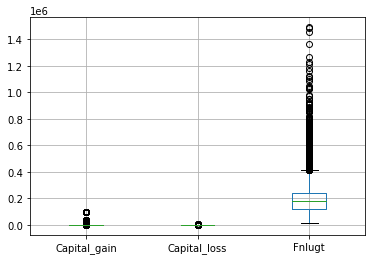

In [47]:
# All that left is 3 columns 'Capital_gain', 'Capital_loss',and 'FnLwgt'
import matplotlib.pyplot as plt
dummy_data.boxplot(column=['Capital_gain','Capital_loss','Fnlugt'])
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scl=MinMaxScaler()

In [49]:
dummy_data.Capital_gain=scl.fit_transform(np.array(dummy_data.Capital_gain.values.astype(float)).reshape(1,-1))[0]
dummy_data.Capital_loss=scl.fit_transform(np.array(dummy_data.Capital_loss.values.astype(float)).reshape(1,-1))[0]
dummy_data.Fnlugt=scl.fit_transform(np.array(dummy_data.Fnlugt.values.astype(float)).reshape(1,-1))[0]


In [51]:
dols=['Workaclass', 'Edu_num',

'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country']

dummy_data=pd.get_dummies(dummy_data,columns=dols)

In [52]:
print('Dummy Dataset shape: %s'%str(dummy_data.shape))

Dummy Dataset shape: (48842, 106)


In [53]:
dummy_data.head()

,Age,Fnlugt,Education,Capital_gain,Capital_loss,HPW,Target,Workaclass_Federal-gov,Workaclass_Local-gov,Workaclass_Never-worked,...,Native_Country_Portugal,Native_Country_Puerto-Rico,Native_Country_Scotland,Native_Country_South,Native_Country_Taiwan,Native_Country_Thailand,Native_Country_Trinadad&Tobago,Native_Country_United-States,Native_Country_Vietnam,Native_Country_Yugoslavia
0,8,0.0,1,0.0,0.0,39,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,21,0.0,11,0.0,0.0,49,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11,0.0,7,0.0,0.0,39,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0.0,15,0.0,0.0,39,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0.0,15,0.0,0.0,29,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### LabelEncoder the target variable

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
lb=LabelEncoder()
dummy_data.Target=lb.fit_transform(dummy_data.Target)

In [57]:
dummy_data.head()

,Age,Fnlugt,Education,Capital_gain,Capital_loss,HPW,Target,Workaclass_Federal-gov,Workaclass_Local-gov,Workaclass_Never-worked,...,Native_Country_Portugal,Native_Country_Puerto-Rico,Native_Country_Scotland,Native_Country_South,Native_Country_Taiwan,Native_Country_Thailand,Native_Country_Trinadad&Tobago,Native_Country_United-States,Native_Country_Vietnam,Native_Country_Yugoslavia
0,8,0.0,1,0.0,0.0,39,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,21,0.0,11,0.0,0.0,49,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11,0.0,7,0.0,0.0,39,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0.0,15,0.0,0.0,39,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0.0,15,0.0,0.0,29,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


####  * Label Data

In [58]:
def lb_encode(x):
    lb=LabelEncoder()
    return lb.fit_transform(x)

In [59]:
label_data=label_data.apply(lb_encode)

In [60]:
label_data.head()

,Age,Workaclass,Fnlugt,Education,Edu_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,HPW,Native_Country,Target
0,8,3,19329,1,6,4,6,3,2,1,0,0,39,38,0
1,21,3,4212,11,8,2,4,0,4,1,0,0,49,38,0
2,11,1,25340,7,11,2,10,0,4,1,0,0,39,38,1
3,27,3,11201,15,9,2,6,0,2,1,98,0,39,38,1
4,1,3,5411,15,9,4,9,3,4,0,0,0,29,38,0


### Question-4: Split both the datasets into training and testing set and apply Gaussian Nalve Bayes.

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#### Dummy Data

In [64]:
X=dummy_data.drop('Target', axis=1)
y=dummy_data.Target
X_drain, X_dest, y_drain, y_dest= train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

In [65]:
dummy_gnb=GaussianNB() 
dummy_gnb.fit(X_drain,y_drain)

GaussianNB()

In [66]:
dummy_pred=dummy_gnb.predict(X_dest)

#### Label Data

In [67]:
lX=label_data.drop('Target', axis=1) 
ly=label_data.Target

X_train, X_test, y_train, y_test = train_test_split(lX, ly, train_size=0.7, test_size=0.3, random_state=101)

In [68]:
label_gnb=GaussianNB() 
label_gnb.fit(X_train,y_train)

GaussianNB()

In [69]:
label_pred=label_gnb.predict(X_test)

### Question-5: Evaluate both the model using confusion matrix.

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score 
from sklearn.metrics import classification_report, f1_score 
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
print('The accuracy of the Gaussian dummy model is:', round(accuracy_score(y_dest, dummy_pred)*100,2))
print('The accuracy of the Gaussian label model is:', round(accuracy_score(y_test, label_pred)*100,2))

The accuracy of the Gaussian dummy model is: 61.52
The accuracy of the Gaussian label model is: 81.61


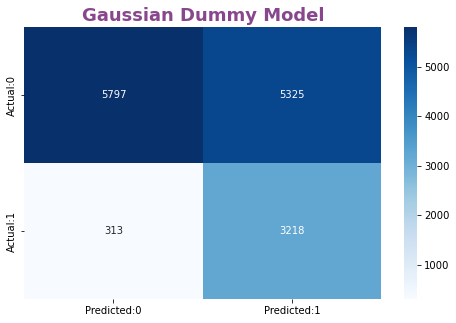

In [73]:
dcm=confusion_matrix(y_dest, dummy_pred)
dconf_matrix=pd.DataFrame(data=dcm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(dconf_matrix, annot=True, fmt='d',cmap='Blues') 
fm={'size':18, 'color': '#88478d', 'weight': 'bold'}
plt.title('Gaussian Dummy Model', **fm)
plt.show()

In [75]:
TN=dcm[0,0]
TP=dcm[1, 1]
FN=dcm[1, 0]
FP=dcm[0, 1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN)
print("True Positive", TP) 
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity)

True Negative 5797
True Positive 3218
False Negative 313
False Positive 5325
Sensitivity 0.9113565562163694
Specificity 0.5212192051789246


The model is more sensitive than specific means it predicts target >50K more accurately.


• Precision:  Ability of model to distinguish between negative and positive labels.

• Rocall: Ability of model to find all positive samples.

• F1 Score: Weighted harmonic mean of the precision and recall.

In [82]:
# Let's see precision and recall values 
#Initializae the evaluation dictionary 
def initialize_evaluator():
    return {'Model':[], 'Accuracy': [], 'Precision': [], 'Recall' : [], 'F1_score':[]}

#Insert data in evaluation dictionary
def insert_data(test, pred,model):
    eval_data=initialize_evaluator()
    eval_data['Accuracy'].append(accuracy_score(test, pred)) 
    eval_data['Precision'].append(precision_score (test, pred))
    eval_data['Model'].append(model)
    eval_data['Recall'].append(recall_score (test, pred)) 
    eval_data['F1_score'].append(f1_score(test, pred)) 
    return eval_data

#Append data of one dictionary to another
def append_data(data1, data2): 
    for i in data1.keys(): 
        data2[i].extend(data1[i]) 
    return data2

dummy_eval_data=insert_data(y_test, dummy_pred, "Gaussian Dummy Model")

In [83]:
pd.DataFrame(dummy_eval_data)

,Model,Accuracy,Precision,Recall,F1_score
0,Gaussian Dummy Model,0.615232,0.376683,0.911357,0.533046


From above we can say that our model is able to correctly classify around 91% guests with>=50K.

In [84]:
# Let's check the classification report of the model
print(classification_report(y_test,dummy_pred))

              precision    recall  f1-score   support

           0       0.95      0.52      0.67     11122
           1       0.38      0.91      0.53      3531

    accuracy                           0.62     14653
   macro avg       0.66      0.72      0.60     14653
weighted avg       0.81      0.62      0.64     14653



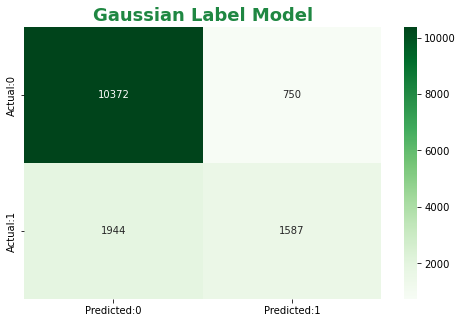

In [87]:
lcm=confusion_matrix(y_test, label_pred)
lconf_matrix=pd.DataFrame(data=lcm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8,5)) 
sns.heatmap(lconf_matrix, annot=True, fmt='d',cmap='Greens') 
fm={'size' :18, 'color': '#1f8742', 'weight': 'bold'} 
plt.title('Gaussian Label Model', **fm) 
plt.show()

In [88]:
TN=lcm[0,0]
TP=lcm[1, 1]
FN=lcm[1, 0]
FP=lcm[0, 1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN)
print("True Positive", TP) 
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity)

True Negative 10372
True Positive 1587
False Negative 1944
False Positive 750
Sensitivity 0.4494477485131691
Specificity 0.9325660852364682


The model is more specific than sensitive means it predicts target <50K more accurately.

In [90]:
label_eval_data=insert_data(y_test, label_pred, 'Gaussian Label Model')
pd.DataFrame(label_eval_data)

,Model,Accuracy,Precision,Recall,F1_score
0,Gaussian Label Model,0.816147,0.679076,0.449448,0.5409


While label model is only able to classify around 44.95% of guests >50K.

In [91]:
#Let's Check the classification report of the model 
print(classification_report (y_test, label_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89     11122
           1       0.68      0.45      0.54      3531

    accuracy                           0.82     14653
   macro avg       0.76      0.69      0.71     14653
weighted avg       0.80      0.82      0.80     14653



In [92]:
eval_data=append_data(label_eval_data, dummy_eval_data)

### Question-6: Apply Bernoulli Naive Bayes on both the datasets and evaluate them again.

In [93]:
from sklearn.naive_bayes import BernoulliNB

#### Dummy Data

In [94]:
dummy_gnb=BernoulliNB(alpha=2) 
dummy_gnb.fit(X_drain,y_drain)

BernoulliNB(alpha=2)

In [95]:
dummy_pred=dummy_gnb.predict(X_dest)

#### Label data

In [96]:
label_gnb=BernoulliNB(alpha=2) 
label_gnb.fit(X_train,y_train)

BernoulliNB(alpha=2)

In [97]:
label_pred=label_gnb.predict(X_test)

In [98]:
print('The accuracy of the Bernoulli dummy model is:', round(accuracy_score(y_dest, dummy_pred)*100,2))
print('The accuracy of the Bernoulli label model is:', round(accuracy_score(y_test, label_pred)*100,2))

The accuracy of the Bernoulli dummy model is: 75.18
The accuracy of the Bernoulli label model is: 73.41


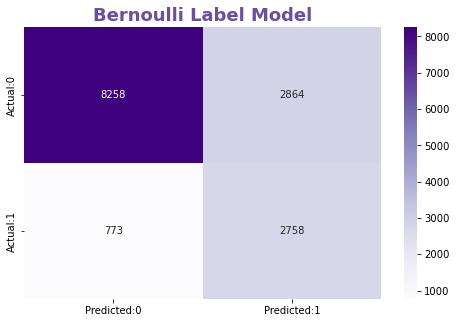

In [99]:
dcm=confusion_matrix(y_dest, dummy_pred)
dconf_matrix=pd.DataFrame(data=dcm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(dconf_matrix, annot=True, fmt='d',cmap='Purples') 
fm={'size':18, 'color': '#694fa2', 'weight': 'bold'}
plt.title('Bernoulli Label Model', **fm)
plt.show()

In [100]:
TN=dcm[0,0]
TP=dcm[1, 1]
FN=dcm[1, 0]
FP=dcm[0, 1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN)
print("True Positive", TP) 
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity)

True Negative 8258
True Positive 2758
False Negative 773
False Positive 2864
Sensitivity 0.7810818465024072
Specificity 0.7424923574896601


In [102]:
bern_dummy_eata=insert_data(y_test, dummy_pred, 'Bernoulli Label Model')
pd.DataFrame(bern_dummy_eata)

,Model,Accuracy,Precision,Recall,F1_score
0,Bernoulli Label Model,0.751791,0.490573,0.781082,0.602644


The model is able to correctly classify 78% of positive data i.e. >=50K.

In [103]:
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82     11122
           1       0.49      0.78      0.60      3531

    accuracy                           0.75     14653
   macro avg       0.70      0.76      0.71     14653
weighted avg       0.81      0.75      0.77     14653



In [104]:
eval_data=append_data(bern_dummy_eata,eval_data)

The model is highly specific than sensitive means it predicts target <50k more accurately.

In [105]:
def format_text(size,color,weight='normal'):
    return{'size':size, 'color':'#'+color, 'weight':weight}

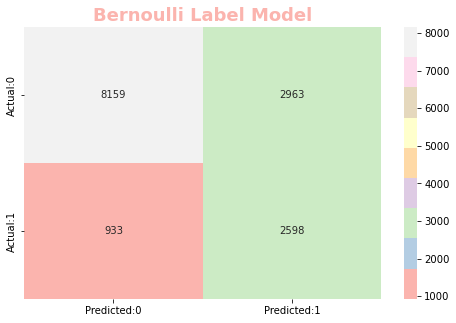

In [106]:
lcm=confusion_matrix(y_test, label_pred)
lconf_matrix=pd.DataFrame(data=lcm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1']) 
plt.figure(figsize=(8,5)) 
sns.heatmap(lconf_matrix, annot=True, fmt='d',cmap='Pastel1') 
fm={'size':18, 'color': '#fbb4ae', 'weight': 'bold'}
plt.title('Bernoulli Label Model', **fm)
plt.show()

In [107]:
TN=lcm[0,0]
TP=lcm[1, 1]
FN=lcm[1, 0]
FP=lcm[0, 1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN)
print("True Positive", TP) 
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity)

True Negative 8159
True Positive 2598
False Negative 933
False Positive 2963
Sensitivity 0.735768903993203
Specificity 0.733591080740874


The model is both specific and sensitive

In [108]:
bern_label_model=insert_data(y_test, label_pred, 'Bernoulli Label Model')
pd.DataFrame(bern_label_model)

,Model,Accuracy,Precision,Recall,F1_score
0,Bernoulli Label Model,0.734116,0.467182,0.735769,0.571491


In [109]:
eval_data=append_data(bern_label_model,eval_data)

In [110]:
pd.DataFrame(eval_data)

,Model,Accuracy,Precision,Recall,F1_score
0,Gaussian Dummy Model,0.615232,0.376683,0.911357,0.533046
1,Gaussian Label Model,0.816147,0.679076,0.449448,0.540900
2,Bernoulli Label Model,0.751791,0.490573,0.781082,0.602644
3,Bernoulli Label Model,0.734116,0.467182,0.735769,0.571491


In [122]:
from matplotlib.gridspec import GridSpec
def plot_models(data):
    sns.set_palette(sns.color_palette("rocket")) 
    super_title={'size':18, 'color':'#c5283d','weight':'bold'}
    sub_title={'size':12, 'color': '#e06777', 'weight':'bold'}
    colors=np.array([[156, 137, 184], [239, 195, 238], [184, 190, 221],[231, 115, 171]]) 
    colors=colors/255 #Matplotlib RGB color range is from 0-1
    data=pd.DataFrame(data)
    fig=plt.figure(figsize=(10,7),constrained_layout=True)
    gs=GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.barh(data.Model,data.Accuracy,color=colors) 
    ax1.tick_params(labelbottom=False, labelleft=True)
    ax1.set_xlim(0,1)
    ax1.set_title('Accuracy',**sub_title)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.barh(data.Model,data.Precision,color=colors) 
    ax2.tick_params(labelbottom=False, labelleft=False)
    ax2.set_xlim(0,1)
    ax2.set_title('Precision',**sub_title) 
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.barh(data.Model,data.Recall,color=colors)
    ax3.tick_params(labelbottom=True, labelleft=True)
    ax3.set_xlim(0,1)
    ax3.set_title('Recall',**sub_title)
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.barh(data.Model,data.F1_score,color=colors) 
    ax4.tick_params(labelbottom=False, labelleft=False)
    ax4.set_xlim(0,1)
    ax4.set_title('F1_Score',**sub_title)
    fig.suptitle("Evaluation",**super_title)
    ax4.tick_params(labelbottom=True, labelleft=False)
    plt.show()

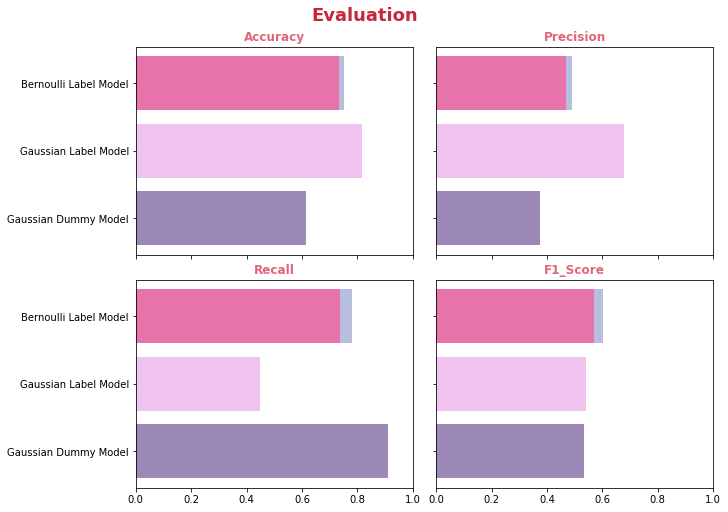

In [123]:
plot_models(eval_data)

From the above graphs, we can determine the best model. Overall, Gaussian Dummy Model has best recall but accuracy is pretty low as well as precision score. Even Gaussian Label Model has best accuracy but the truth is that the model is performing really bad as recall is worst. On an average sense, we can see that our Bernoulli Label model is performing well enough to be selected.

###### Conclusion:
Even though the dummy Bernoulli model produced better accuracy it would not appreciated if it used as it is highly specific. As Bernoulli label model has a good accuracy of 73.41%, it would best if this is used. As discussed in the module Gaussian Naive Bayes model is always best used when data is continous and normally distributed which is why dummy Gaussian naive bayes failed to produce better accuracy than label Gaussian model. Bemouli model is best used when we have independent features and have a binary outcome.